In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import glob
import csv
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
ls

first_try.h5  image/  imagemodel_dataset.csv  image_model.ipynb


In [12]:
images = {} #image_file:RGB
for file in glob.glob("/content/drive/My Drive/team28/image/*"):
    im = cv2.imread(file) # BGR
    images[file] = im

150
(454, 808, 3)


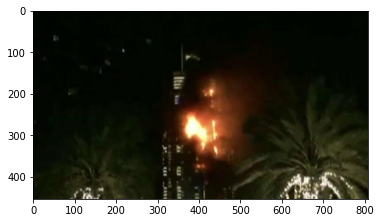

In [13]:
print(len(images.values()))
print(list(images.values())[0].shape)
plt.imshow(list(images.values())[0][:,:,[2,1,0]]) # conver to RGB

In [14]:
keys = list(images.keys())
for k in keys:
    square_length = min(len(images[k]), len(images[k][0]))
    images[k] = images[k][:square_length,:square_length,:]
    compress = int(square_length / 100)
    images[k] = images[k][::compress,::compress,[2,1,0]]
    if images[k].shape != (100, 100, 3):
        images[k] = images[k][:100,:100,:]

In [11]:
print(keys)

['/content/drive/My Drive/team28/image/82591.jpg', '/content/drive/My Drive/team28/image/82593.jpg', '/content/drive/My Drive/team28/image/82594.jpg', '/content/drive/My Drive/team28/image/82596.jpg', '/content/drive/My Drive/team28/image/82597.jpg', '/content/drive/My Drive/team28/image/82598.jpg', '/content/drive/My Drive/team28/image/82599.jpg', '/content/drive/My Drive/team28/image/82600.jpg', '/content/drive/My Drive/team28/image/82603.jpg', '/content/drive/My Drive/team28/image/82604.jpg', '/content/drive/My Drive/team28/image/82605.jpg', '/content/drive/My Drive/team28/image/82606.jpg', '/content/drive/My Drive/team28/image/82607.jpg', '/content/drive/My Drive/team28/image/82608.jpg', '/content/drive/My Drive/team28/image/82609.jpg', '/content/drive/My Drive/team28/image/82610.jpg', '/content/drive/My Drive/team28/image/82612.jpg', '/content/drive/My Drive/team28/image/82613.jpg', '/content/drive/My Drive/team28/image/82614.jpg', '/content/drive/My Drive/team28/image/82615.jpg',

In [15]:
import sys
csv.field_size_limit(sys.maxsize)

X_data = [] #image
Y_data = [] #subjectivity

i = 0
with open('/content/drive/My Drive/team28/imagemodel_dataset.csv', 'r') as csvreader:
    reader = csv.DictReader(csvreader)
    for row in reader:
        file_name = "/content/drive/My Drive/team28/image/" + row['id'] + ".jpg"
        target = row['subjectivity']
        try:
            X_data.append(images[file_name])
            Y_data.append(float(target))
            i += 1
        except:
            print(file_name)
        if i == 150:
            break

/content/drive/My Drive/team28/image/82595.jpg
/content/drive/My Drive/team28/image/82602.jpg
/content/drive/My Drive/team28/image/82617.jpg
/content/drive/My Drive/team28/image/82624.jpg
/content/drive/My Drive/team28/image/82631.jpg
/content/drive/My Drive/team28/image/82635.jpg
/content/drive/My Drive/team28/image/82639.jpg
/content/drive/My Drive/team28/image/82640.jpg
/content/drive/My Drive/team28/image/82643.jpg
/content/drive/My Drive/team28/image/82648.jpg
/content/drive/My Drive/team28/image/82655.jpg
/content/drive/My Drive/team28/image/82658.jpg
/content/drive/My Drive/team28/image/82665.jpg
/content/drive/My Drive/team28/image/82668.jpg
/content/drive/My Drive/team28/image/82673.jpg
/content/drive/My Drive/team28/image/82675.jpg
/content/drive/My Drive/team28/image/82678.jpg
/content/drive/My Drive/team28/image/82679.jpg
/content/drive/My Drive/team28/image/82681.jpg
/content/drive/My Drive/team28/image/82684.jpg
/content/drive/My Drive/team28/image/82721.jpg
/content/driv

In [16]:
print(len(X_data) == len(Y_data))
print(len(X_data))

True
150


In [31]:
# INPUT SHAPE
print(X_data[0].shape)
# OUTPUT SHAPE
print(Y_data[0])

(100, 100, 3)
0.4443434343434344


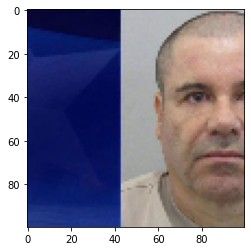

In [33]:
plt.imshow(X_data[75])

(array([ 1.,  0.,  1.,  2.,  1.,  9.,  5.,  9., 23., 27., 40., 18., 11.,
         0.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

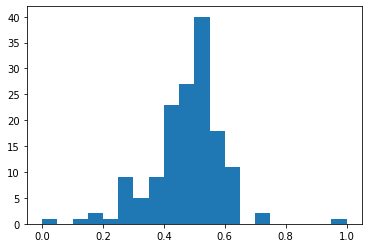

In [17]:
Y_data_norm = np.array([(a-min(Y_data))/(max(Y_data) - min(Y_data)) for a in Y_data])
plt.hist(Y_data_norm, bins = 20)

In [18]:
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.python.keras.models import Model

model_vgg16_conv = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))


# Check the trainable status of the individual layers
for layer in model_vgg16_conv.layers:
    print(layer)

input = Input(shape=(100,100,3),name = 'image_input')
output_vgg16_conv = model_vgg16_conv(input)


x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(1024, activation='relu', name='fc2')(x)
x = Dense(1, activation='linear', name='pred')(x)

model = Model(input, x)

58892288/58889256 [==============================] - 0s 0us/step


In [19]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mse'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 100, 100, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              18878464  
_________________________________________________________________
fc2 (Dense)                  (None, 1024)              4195328   
_________________________________________________________________
pred (Dense)                 (None, 1)                 1025      
Total params: 37,789,505
Trainable params: 37,789,505
Non-trainable params: 0
__________________________________________

In [20]:
# train : test = 8:2 9:1
X_data_norm = tf.cast(np.asarray(X_data), tf.float64)/255
X_train = X_data_norm[5:]
Y_train = Y_data_norm[5:]
X_test = X_data_norm[:5]
Y_test = Y_data_norm[:5]

0.5334317534317534


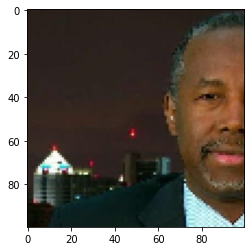

In [38]:
plt.imshow(X_test[1])
print(Y_test[1])

In [21]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices()) 

['/device:CPU:0', '/device:XLA_CPU:0', '/device:XLA_GPU:0', '/device:GPU:0']


In [22]:
model.fit(X_train, np.asarray(Y_train),
        validation_data=(np.asarray(X_test), np.asarray(Y_test)),
        batch_size = 32,
        validation_batch_size = 2,
        epochs=3,
        verbose=2)
model.save('/content/drive/My Drive/team28/first_try.h5')

Epoch 1/3
5/5 - 1s - loss: 489.7859 - mse: 489.7859 - val_loss: 139.8795 - val_mse: 139.8795
Epoch 2/3
5/5 - 0s - loss: 40.3906 - mse: 40.3906 - val_loss: 0.9264 - val_mse: 0.9264
Epoch 3/3
5/5 - 0s - loss: 0.4942 - mse: 0.4942 - val_loss: 0.1435 - val_mse: 0.1435


In [51]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/team28/first_try.h5')
model.evaluate(x = X_test, y = Y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.0100 - mean_squared_error: 0.0100


[0.009953981265425682, 0.009953981265425682]